<class 'torch.utils.data.dataloader.DataLoader'>


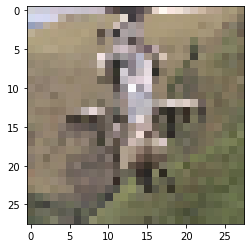

Helicopter
torch.Size([1, 3, 28, 28])


In [1]:
#%% import libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import os
from torch.utils.data import (Dataset,DataLoader)
from skimage import io
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")


#%% import data

class veri(Dataset):
    
    def __init__(self,csv_file,root_dir,transforms=None):
        self.annotions=pd.read_csv(csv_file)
        self.root_dir=root_dir
        self.transform= transforms
        
    def __len__(self):
        return len(self.annotions)
    
    def __getitem__(self,index):
        img_path=os.path.join(self.root_dir,self.annotions.iloc[index,0])
        image=io.imread(img_path)
        y_label=torch.tensor(int(self.annotions.iloc[index,1]))
        
        if self.transform:
            image=self.transform(image)  
            
        return (image,y_label)    

#%% Data Preparing

dataset=veri(csv_file=r"C:/Users/cinar/Desktop/armed_forces.csv",
             root_dir=r"C:/Users/cinar/Desktop/armed_forces",
             transforms=torchvision.transforms.Compose([
                 
                 transforms.ToTensor(),
                 transforms.Resize(size=(28,28)),
                 transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5),)
                 
                 ]))





#%% Data Preprocessing

train_set,test_set=torch.utils.data.random_split(dataset,[200,19])
train_loader=DataLoader(dataset=train_set,batch_size=1,shuffle=True)
test_loader=DataLoader(dataset=test_set,batch_size=1,shuffle=True)

print(type(train_loader))

#%% Data Visualization

import matplotlib.pyplot as plt
import numpy as np

batch_size=1
classes=["Aircraft","Battleship","Helicopter","Combat Tank"]

# classes=["Ferrari","Mclaren","Mercedes","Redbull"]

def imshow(img):
    img= img/2 + 0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
    

dataiter=iter(train_loader)
images,labels= dataiter.next() 

imshow(torchvision.utils.make_grid(images))   

print("".join("%5s" % classes[labels[j]] for j in range (batch_size)))
print(images.size())

In [2]:
#%%  Create model architecture

class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()

        #Conv2d
        self.conv1=nn.Conv2d(in_channels=3, out_channels=4, kernel_size=(5,5))
        self.conv2=nn.Conv2d(in_channels=4, out_channels=8, kernel_size=(3,3))
        self.conv3=nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(2,2))
        self.conv4=nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(2,2))
        
        #MaxPool2d
        self.max=nn.MaxPool2d(kernel_size=(2,2))
        
        #Activation function
        self.func=nn.ELU()
        self.func1=nn.ReLU()
        
        #Linear horizons
        self.fc1=nn.Linear(in_features=32, out_features=50)
        self.fc2=nn.Linear(in_features=50, out_features=50)
        self.fc3=nn.Linear(in_features=50, out_features=100)
        self.fc4=nn.Linear(in_features=100, out_features=4)#4 classımız var
        
    def forward(self,x):
            
        x=self.conv1(x)
        x=self.func(x)
            
        x=self.max(x)
            
        x=self.conv2(x)
        x=self.func(x)
            
        x=self.max(x)
            
        x=self.conv3(x)
        x=self.func(x)
            
        x=self.max(x)
            
        x=self.conv4(x)
        x=self.func(x)
            
            #flatten
        x=x.view(x.size(0),-1)
            
            
            #Neural Network
        x=self.fc1(x)
        x=self.func(x)
        x=self.fc2(x)
        x=self.func(x)
        x=self.fc3(x)
        x=self.func(x)
        x=self.fc4(x)
            
        return x
            

In [4]:
#%% Tensorboard and model create

import time
from itertools import product
from torch.utils.tensorboard import SummaryWriter

start=time.time()

def get_num_correct(preds,labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

parametre=dict(lr=[0.1,0.01,0.001],batch_size=[1,2])
parametre_values=[v for v in parametre_values()]



for lr,batch_size in product(*parametre_values):
    
    model=Net()
    optimizer=torch.optim.Adam(model.parameters(),lr=lr)
    error=torch.nn.CrossEntropyLoss()
    images,label=next(iter(train_loader))
    grid=torchvision.make_grid(images)
    
    tensorboard=SummaryWriter(comment=f" batch_size={batch_size} lr={lr}")
    tensorboard.add_image("Image",grid)
    tensroboard.add_graph(model,images)
    
    for epoch in range(20):
        
        total_loss=0
        total_correct=0
        
        for i,(images,labels) in enumerate (train_loader):
        
            preds= model(images)
            loss=error(preds,labels)
            optimizer.zero_grad()
            loss.backward() # geri yayılım
            optimizer.step()

            total_loss+=loss.item() * batch_size
            total_correct+=get_num_correct(preds,labels)
    
    
    tensorboard.add_scalar("Loss :",total_loss,epoch)
    tensorboard.add_scalar("Accuracy :",total_correct/len(train_set,epoch)
    tensorboard.add_scalar("Number Correct :",total_correct,epoch)




SyntaxError: invalid syntax (Temp/ipykernel_12284/1177220131.py, line 48)